# Анализ датасета `train.csv`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

df = pd.read_csv("data/train.csv")
df.shape

(188533, 13)

## Обзор

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [3]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,188533.0,NaN,NaN,NaN,94266.0,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
brand,188533,57,Ford,23088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,188533,1897,F-150 XLT,2945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,188533.0,NaN,NaN,NaN,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,NaN,NaN,NaN,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
fuel_type,183450,7,Gasoline,165940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,188533,1117,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,188533,52,A/T,49904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_col,188533,319,Black,48658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col,188533,156,Black,107674,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Пропуски, дубликаты, уникальные значения

In [4]:
df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

Есть пропуски в fuel_type, accident, clean_title. recyclable_package, low_fat, coffee_bar, video_store, salad_bar, prepared_food, florist - бинарные.
total_children, num_children_at_home и avg_cars_at home(approx).1 - похожи на дискретные

## Визуализация: распределения признаков

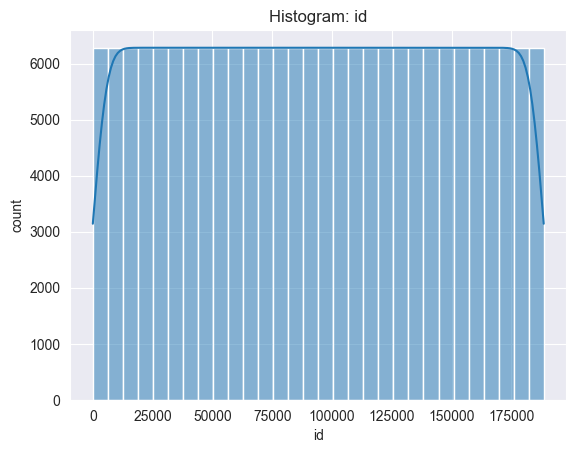

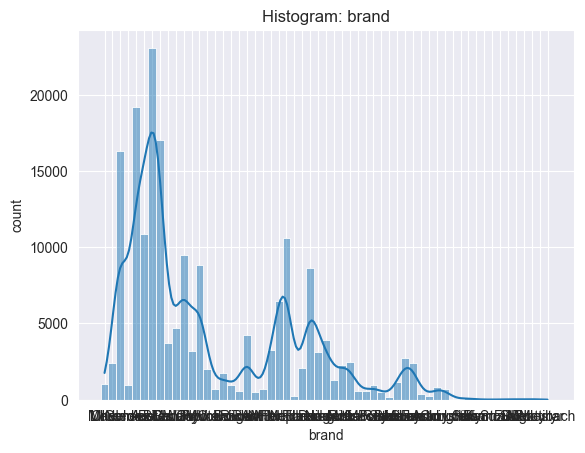

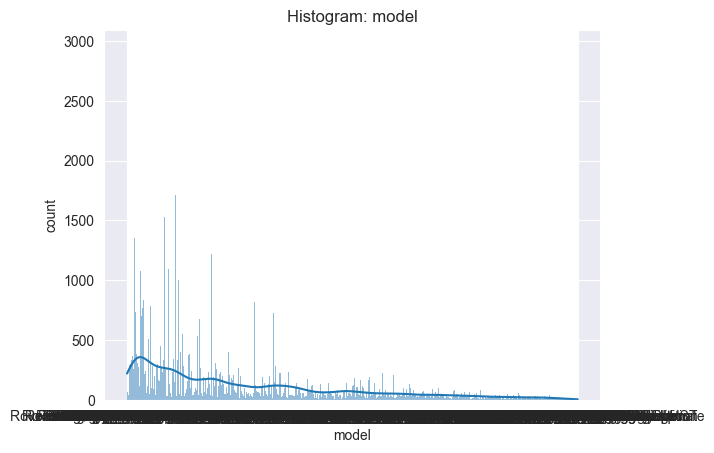

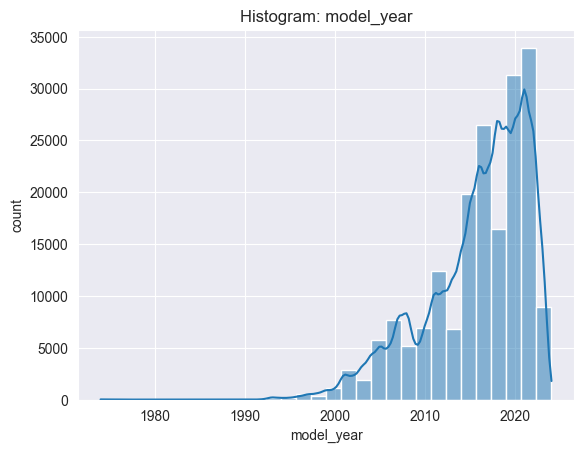

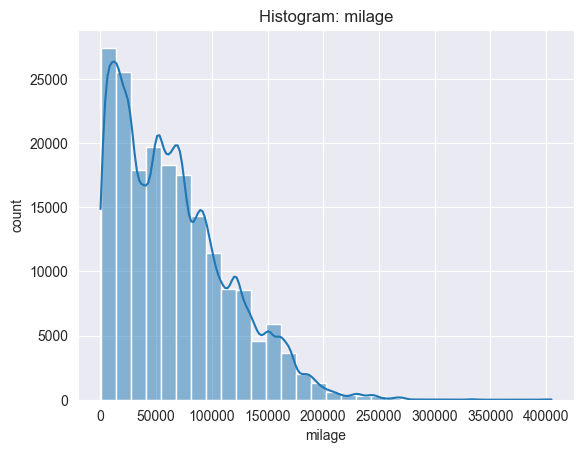

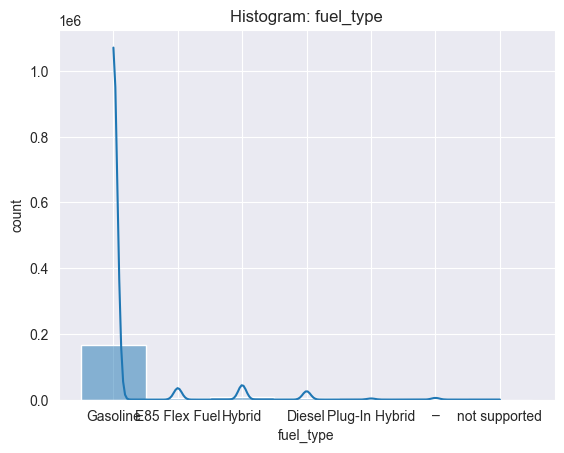

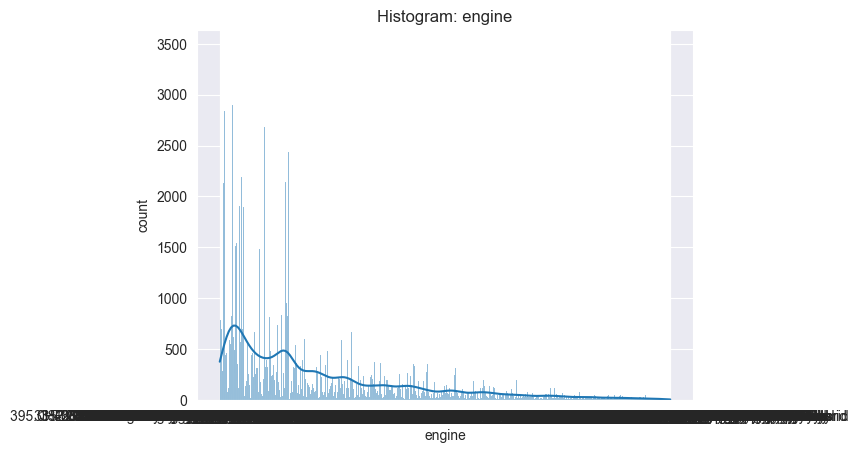

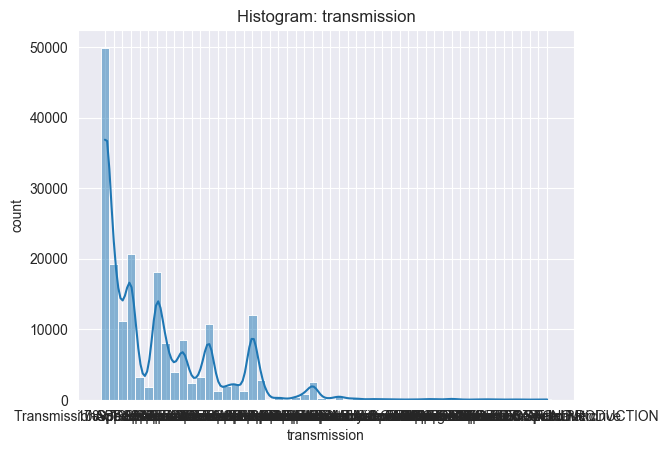

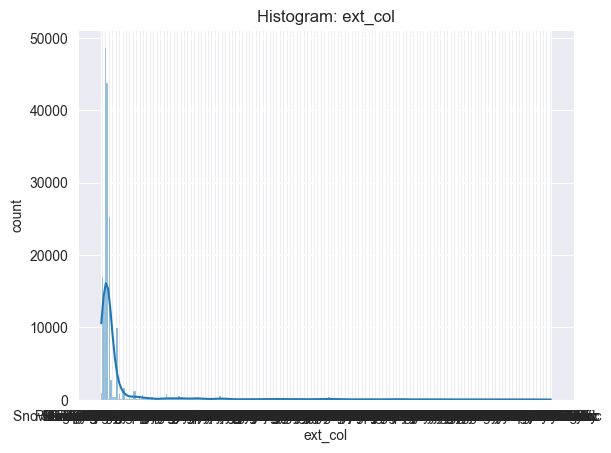

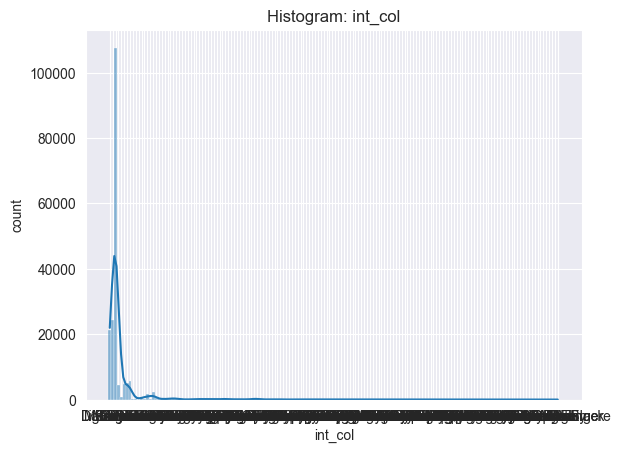

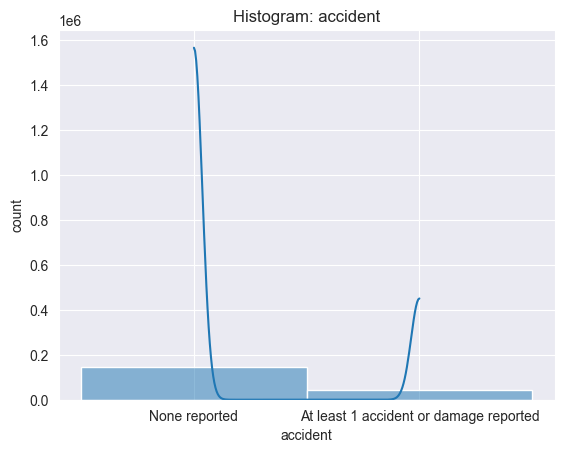

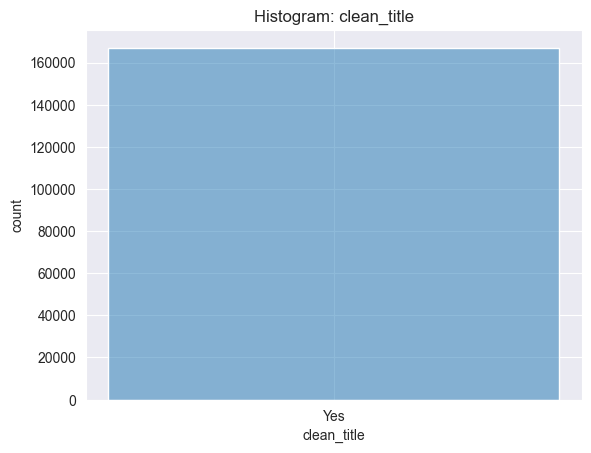

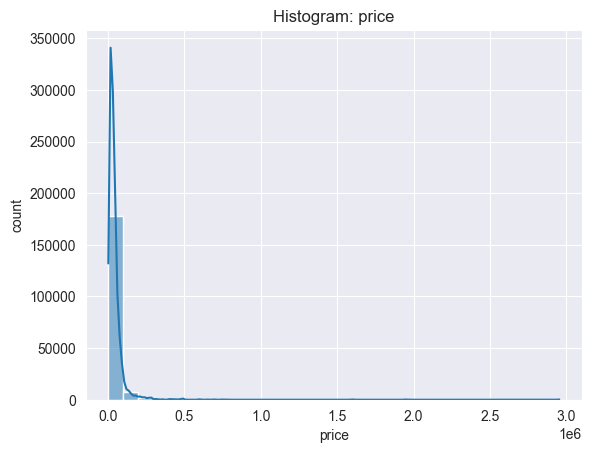

In [7]:
for c in df.columns:
    plt.figure()
    sns.histplot(df[c], bins=30, kde=True)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.show()

## Корреляции

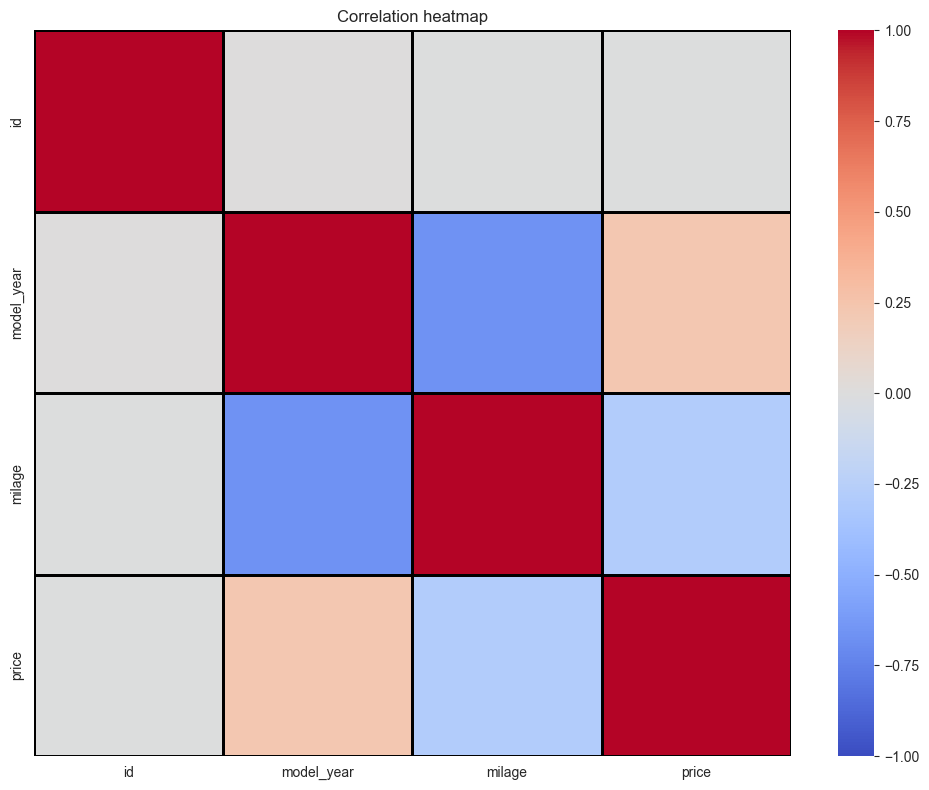

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

## Pairplot

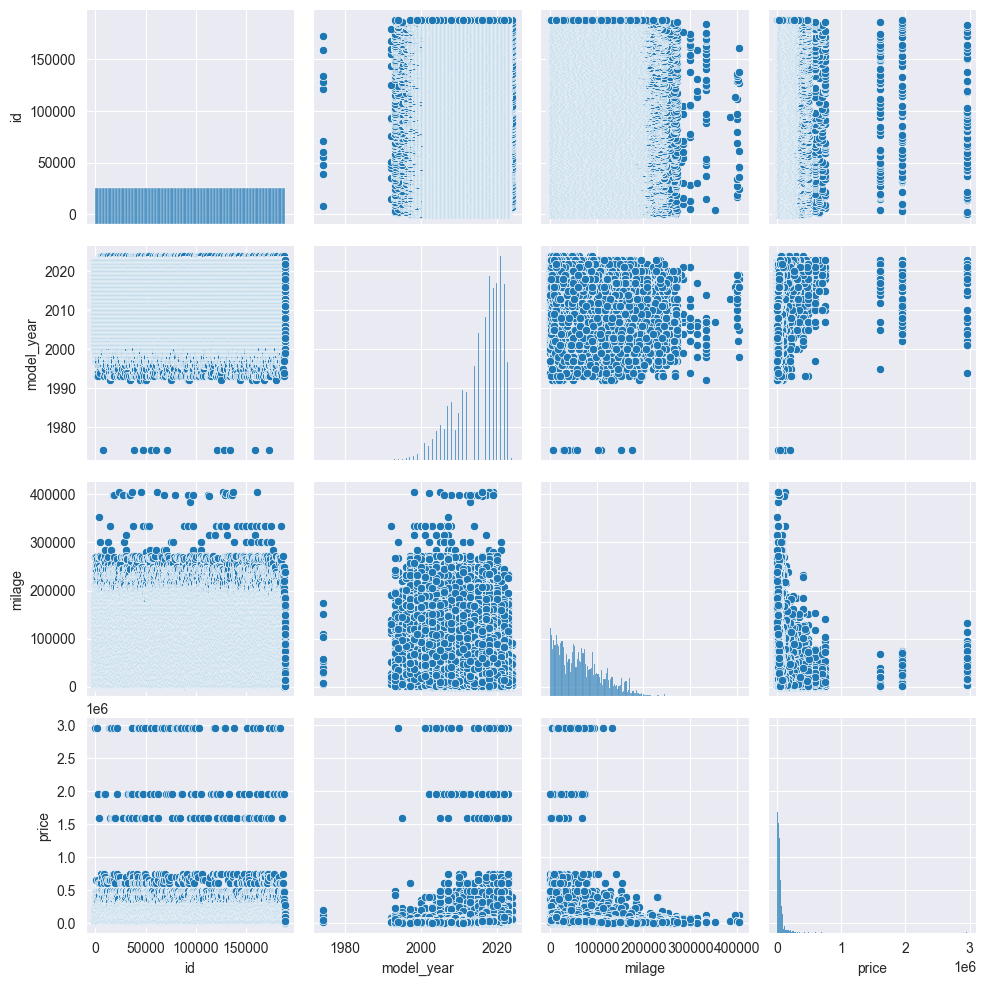

In [9]:
sns.pairplot(df)

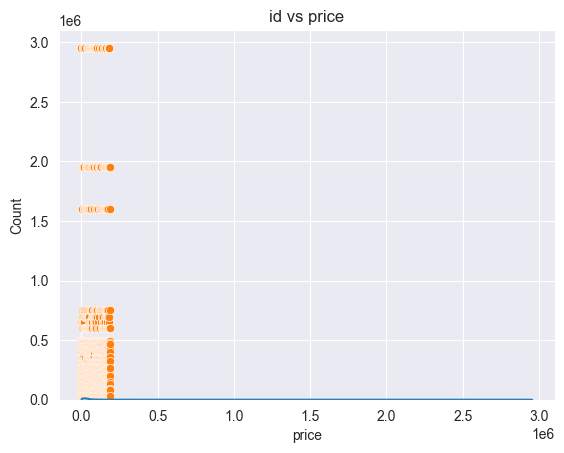

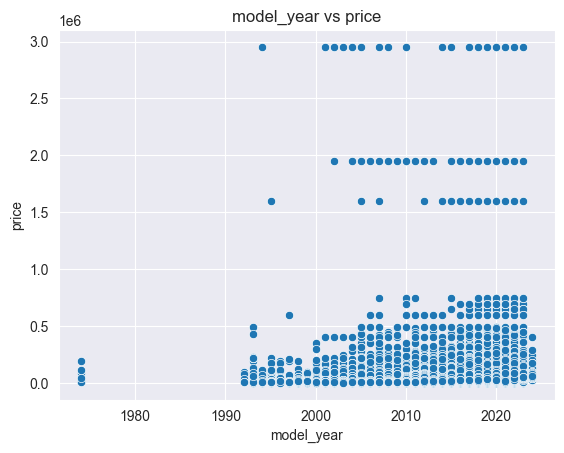

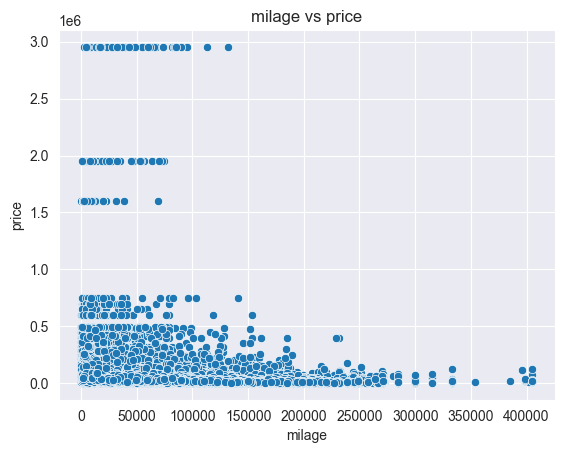

,count,mean
brand,,
Ford,23088,40511.969508
Mercedes-Benz,19172,51244.399541
BMW,17028,43659.775487
Chevrolet,16335,41836.755127
Audi,10887,41004.856985
Porsche,10612,70899.947795
Land,9525,53204.880000
Toyota,8850,29147.812542
Lexus,8643,34801.090131


,count,mean
model,,
F-150 XLT,2945,42709.795925
M3 Base,2229,38032.437865
Camaro 2SS,1709,35962.599766
M4 Base,1622,58951.160296
Mustang GT Premium,1526,33148.771298
F-150 Lariat,1410,40947.711348
E-Class E 350 4MATIC,1357,24167.272660
1500 Laramie,1249,65848.744596
911 Carrera S,1219,83683.102543


,count,mean
fuel_type,,
Gasoline,165940,43360.013782
Hybrid,6832,55473.451698
E85 Flex Fuel,5406,26729.755457
Diesel,3955,48769.587358
–,781,36414.285531
Plug-In Hybrid,521,44150.967370
not supported,15,20692.733333


,count,mean
engine,,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462,36187.589255
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902,20180.156788
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841,54484.651531
2.0L I4 16V GDI DOHC Turbo,2680,44938.620896
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451,49727.456140
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2436,37482.804598
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2187,75437.270690
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2138,44188.565949
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel,2134,58444.784911


,count,mean
transmission,,
A/T,49904,31711.979140
8-Speed A/T,20645,56442.748656
Transmission w/Dual Shift Mode,19255,50201.815580
6-Speed A/T,18044,25864.659998
6-Speed M/T,11998,33266.568011
7-Speed A/T,11124,47123.507371
Automatic,10691,59588.575344
8-Speed Automatic,8431,68268.461986
10-Speed A/T,8044,58806.705992


,count,mean
ext_col,,
Black,48658,42417.511447
White,43815,40803.542622
Gray,25293,47908.967106
Silver,16995,31878.405296
Blue,14555,40658.658811
Red,9901,39977.708413
Green,2698,53064.767976
Gold,1668,23090.873501
Brown,1162,33947.655766


,count,mean
int_col,,
Black,107674,45524.117958
Beige,24495,29953.997428
Gray,21204,28182.418129
Brown,5810,47406.989501
Red,5145,59286.907872
White,4743,57884.472907
–,4527,45752.759443
Jet Black,2398,57881.426188
Ebony,1833,49470.199127


,count,mean
accident,,
None reported,144514,49024.804144
At least 1 accident or damage reported,41567,25334.071475


,count,mean
clean_title,,
Yes,167114,41354.406704


In [10]:
target = "price"

df[target].describe()
sns.histplot(df[target], kde=True)

num_cols = df.select_dtypes(include="number").columns.drop(target, errors="ignore")
for c in num_cols:
    sns.scatterplot(x=df[c], y=df[target])
    plt.title(f"{c} vs {target}")
    plt.show()

cat_cols = df.select_dtypes(exclude="number").columns
for c in cat_cols:
    tmp = df.groupby(c)[target].agg(['count','mean']).sort_values('count', ascending=False).head(30)
    display(tmp)


In [11]:
def top_freq(s, top=20):
    vc = s.value_counts(dropna=False)
    out = vc.head(top).to_frame("cnt")
    out["share"] = out["cnt"] / len(s)
    return out

for c in df.select_dtypes(exclude="number").columns:
    display(c, top_freq(df[c], 25))


'brand'

,cnt,share
brand,,
Ford,23088,0.122461
Mercedes-Benz,19172,0.101690
BMW,17028,0.090318
Chevrolet,16335,0.086643
Audi,10887,0.057746
Porsche,10612,0.056287
Land,9525,0.050522
Toyota,8850,0.046941
Lexus,8643,0.045843


'model'

,cnt,share
model,,
F-150 XLT,2945,0.015621
M3 Base,2229,0.011823
Camaro 2SS,1709,0.009065
M4 Base,1622,0.008603
Mustang GT Premium,1526,0.008094
F-150 Lariat,1410,0.007479
E-Class E 350 4MATIC,1357,0.007198
1500 Laramie,1249,0.006625
911 Carrera S,1219,0.006466


'fuel_type'

,cnt,share
fuel_type,,
Gasoline,165940,0.880164
Hybrid,6832,0.036238
E85 Flex Fuel,5406,0.028674
NaN,5083,0.026961
Diesel,3955,0.020978
–,781,0.004143
Plug-In Hybrid,521,0.002763
not supported,15,0.000080


'engine'

,cnt,share
engine,,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462,0.018363
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902,0.015393
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841,0.015069
2.0L I4 16V GDI DOHC Turbo,2680,0.014215
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451,0.013000
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2436,0.012921
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2187,0.011600
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2138,0.011340
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel,2134,0.011319


'transmission'

,cnt,share
transmission,,
A/T,49904,0.264696
8-Speed A/T,20645,0.109503
Transmission w/Dual Shift Mode,19255,0.102131
6-Speed A/T,18044,0.095707
6-Speed M/T,11998,0.063639
7-Speed A/T,11124,0.059003
Automatic,10691,0.056706
8-Speed Automatic,8431,0.044719
10-Speed A/T,8044,0.042666


'ext_col'

,cnt,share
ext_col,,
Black,48658,0.258087
White,43815,0.232400
Gray,25293,0.134157
Silver,16995,0.090143
Blue,14555,0.077201
Red,9901,0.052516
Green,2698,0.014310
Gold,1668,0.008847
Brown,1162,0.006163


'int_col'

,cnt,share
int_col,,
Black,107674,0.571115
Beige,24495,0.129924
Gray,21204,0.112468
Brown,5810,0.030817
Red,5145,0.027290
White,4743,0.025157
–,4527,0.024012
Jet Black,2398,0.012719
Ebony,1833,0.009722


'accident'

,cnt,share
accident,,
None reported,144514,0.766518
At least 1 accident or damage reported,41567,0.220476
NaN,2452,0.013006


'clean_title'

,cnt,share
clean_title,,
Yes,167114,0.886391
NaN,21419,0.113609


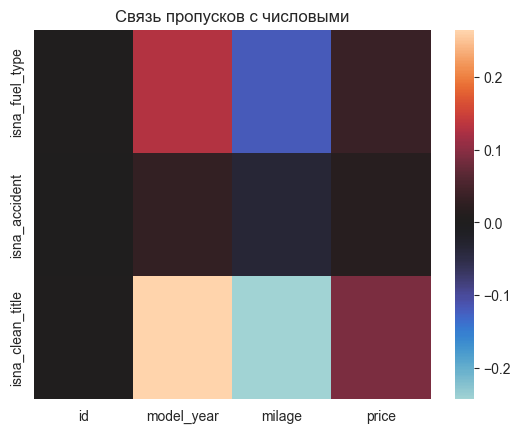

In [12]:
miss_cols = [c for c in df.columns if df[c].isna().any()]
miss_ind = df[miss_cols].isna().astype(int).add_prefix("isna_")
corr_miss = pd.concat([df.select_dtypes("number"), miss_ind], axis=1).corr(numeric_only=True)

sns.heatmap(corr_miss.loc[miss_ind.columns, df.select_dtypes("number").columns], center=0)
plt.title("Связь пропусков с числовыми")
plt.show()


price         20.268453
milage         0.895062
id             0.000000
model_year    -1.044511
dtype: float64

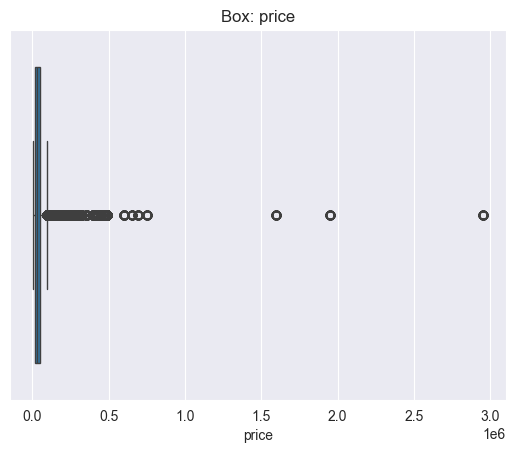

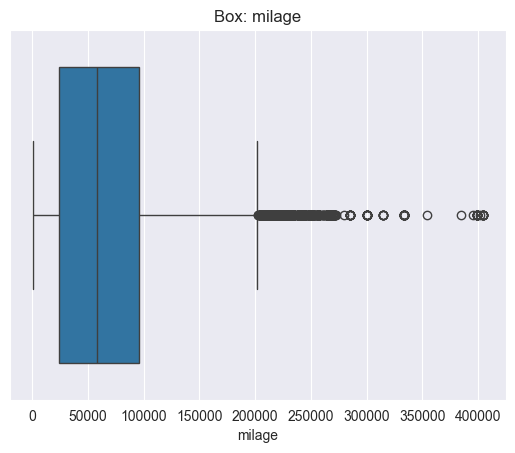

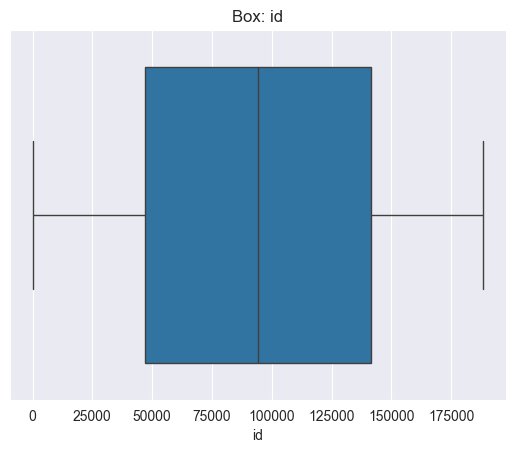

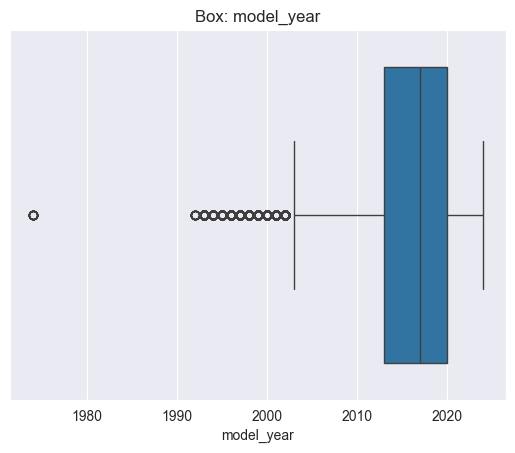

In [13]:
num_cols = df.select_dtypes(include="number").columns
sk = df[num_cols].skew(numeric_only=True).sort_values(ascending=False)
display(sk.head(20))

for c in sk.head(10).index:
    sns.boxplot(x=df[c]); plt.title(f"Box: {c}"); plt.show()


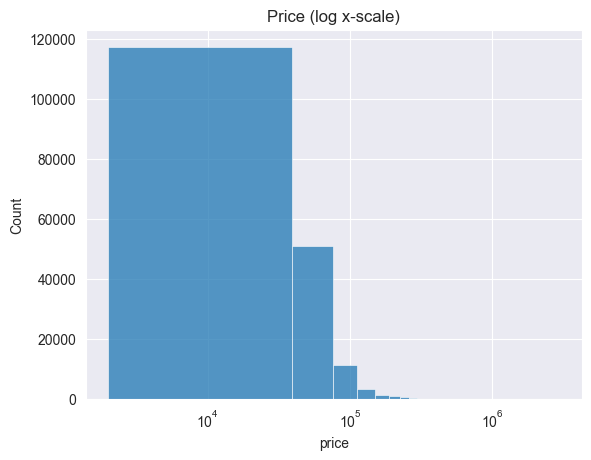

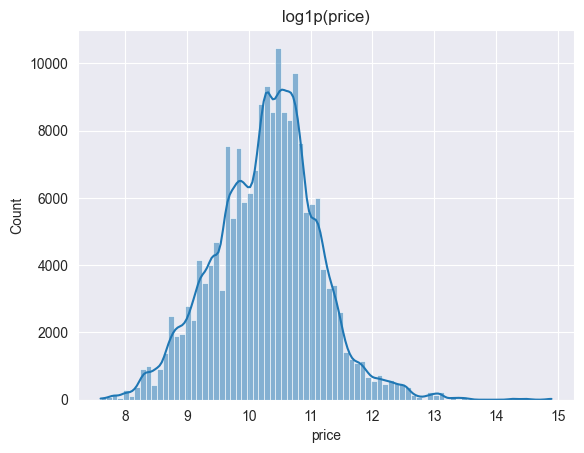

In [18]:
y = df[target]

# лог-шкала по оси X
sns.histplot(y, bins=80)
plt.xscale("log"); plt.title("Price (log x-scale)"); plt.show()

# распределение log1p(price)
sns.histplot(np.log1p(y), bins=80, kde=True)
plt.title("log1p(price)"); plt.show()

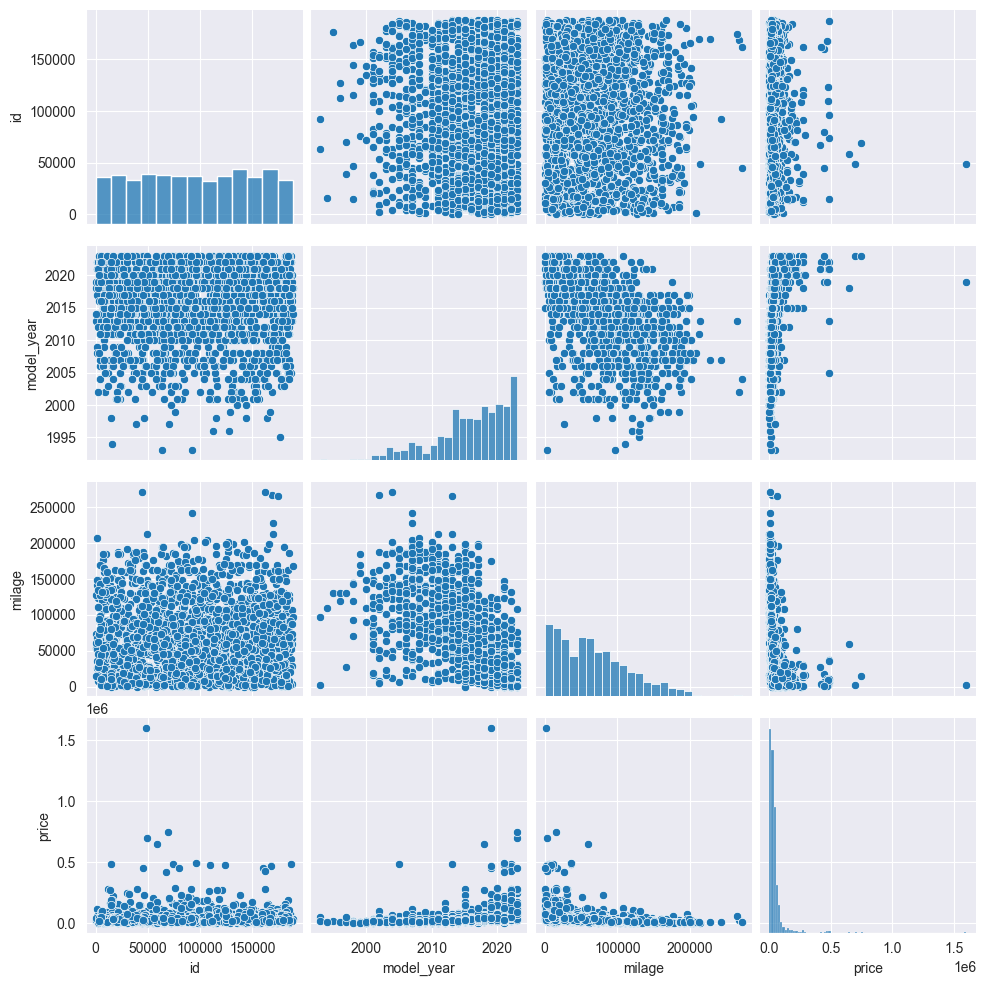

In [15]:
sample = df.sample(min(len(df), 2000), random_state=42)
sns.pairplot(sample.select_dtypes("number"))

In [ ]:
sns.histplot(np.log1p(y), bins=80, kde=True)